0 - Importando pacotes

In [1]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

1 - Definindo variáveis

In [8]:
t, n = smp.symbols('t n')

DG = 7
Apos = DG
Aneg = -DG
T0 = -DG/2
T1 = DG/2
T2 = 4.5*DG
w = 2*smp.pi/(T2-T0)

n_arr = np.linspace(1,20,20)
n_arr

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

2 - Definindo funções

In [37]:
xa = smp.cos(n*w*t)
xb = smp.sin(n*w*t)

# Teste para verificar se as funções estão certas

# xa_func = smp.lambdify((t, n), xa)
# xb_func = smp.lambdify((t, n), xb)

# fig = plt.figure(1)
# plt.plot(np.linspace(0, 4*float(smp.pi/w), 100), xa_func(1, np.linspace(0, 4*float(smp.pi/w), 100)))
# plt.plot(np.linspace(0, 4*float(smp.pi/w), 100), xb_func(1, np.linspace(0, 4*float(smp.pi/w), 100)))
# plt.show()

3 - Achando vetores com coeficientes $a_n\:\mathrm{e}\:b_n$

Definindo funções para calcular $a_n\:\mathrm{e}\:b_n$

In [61]:
def calc_func(xx):
    xN = smp.integrate(Apos*xx, (t, T0, T1)) + smp.integrate(Aneg*xx, (t, T1, T2))
    xD = smp.integrate(xx**2, (t, T0, T2))
    xn_coef = xN/xD
    return xn_coef

Definindo $a_n$

In [74]:
an_coef = calc_func(xa)
an_num = np.array([an_coef.subs(n, i).simplify() for i in n_arr])
an_num

array([(-122.5*sin(1.8*pi) + 367.5*sin(0.2*pi))/(4.375*sin(1.6*pi) + 4.375*sin(0.4*pi) + 17.5*pi),
       (-61.25*sin(1.6*pi) + 183.75*sin(0.4*pi))/(2.1875*sin(1.2*pi) + 2.1875*sin(0.2*pi) + 17.5*pi),
       (-40.8333333333333*sin(1.4*pi) + 122.5*sin(0.6*pi))/(1.45833333333333*sin(1.2*pi) + 1.45833333333333*sin(0.800000000000001*pi) + 17.5*pi),
       (-30.625*sin(1.2*pi) + 91.875*sin(0.8*pi))/(1.09375*sin(1.6*pi) + 1.09375*sin(0.4*pi) + 17.5*pi),
       73.5*sin(1.0*pi)/(0.875*sin(2.0*pi) + 17.5*pi),
       (61.25*sin(1.2*pi) - 20.4166666666667*sin(0.800000000000001*pi))/(0.729166666666667*sin(1.6*pi) + 0.729166666666667*sin(0.4*pi) + 17.5*pi),
       (52.5*sin(1.4*pi) - 17.5*sin(0.6*pi))/(0.625*sin(1.2*pi) + 0.625*sin(0.8*pi) + 17.5*pi),
       (45.9375*sin(1.6*pi) - 15.3125*sin(0.4*pi))/(0.546875*sin(1.2*pi) + 0.546875*sin(0.199999999999999*pi) + 17.5*pi),
       (40.8333333333333*sin(1.8*pi) - 13.6111111111111*sin(0.199999999999999*pi))/(0.486111111111111*sin(1.6*pi) + 0.4861111111

Definindo $b_n$

In [76]:
bn_coef = calc_func(xb)
bn_num = np.array([bn_coef.subs(n, i).simplify() for i in n_arr])
bn_num

array([122.5*(-cos(1.8*pi) + cos(0.2*pi))/(-17.5*pi + 4.375*sin(1.6*pi) + 4.375*sin(0.4*pi)),
       61.25*(-cos(1.6*pi) + cos(0.4*pi))/(-17.5*pi + 2.1875*sin(1.2*pi) + 2.1875*sin(0.2*pi)),
       40.8333333333333*(cos(0.6*pi) - cos(1.4*pi))/(-17.5*pi + 1.45833333333333*sin(1.2*pi) + 1.45833333333333*sin(0.800000000000001*pi)),
       30.625*(cos(0.8*pi) - cos(1.2*pi))/(-17.5*pi + 1.09375*sin(1.6*pi) + 1.09375*sin(0.4*pi)),
       24.5*(cos(1.0*pi) + 1)/(-17.5*pi + 0.875*sin(2.0*pi)),
       20.4166666666667*(cos(1.2*pi) - cos(0.800000000000001*pi))/(-17.5*pi + 0.729166666666667*sin(1.6*pi) + 0.729166666666667*sin(0.4*pi)),
       17.5*(cos(1.4*pi) - cos(0.6*pi))/(-17.5*pi + 0.625*sin(1.2*pi) + 0.625*sin(0.8*pi)),
       15.3125*(-cos(0.4*pi) + cos(1.6*pi))/(-17.5*pi + 0.546875*sin(1.2*pi) + 0.546875*sin(0.199999999999999*pi)),
       13.6111111111111*(-cos(0.199999999999999*pi) + cos(1.8*pi))/(-17.5*pi + 0.486111111111111*sin(1.6*pi) + 0.486111111111111*sin(0.399999999999999*pi)),
   

Definindo coeficiente $a_0$ e $b_0$

In [77]:
a0 = an_coef.subs(n, 0)
b0 = bn_coef.subs(n, 0)

display(a0)
display(b0)

-4.20000000000000

nan

Como o valor de $b_0$ deu $NaN$, será substituido por 0

In [78]:
b0 = 0
ajuste_total = a0 + b0
ajuste_total

-4.20000000000000

4 - Descobrindo aproximação para a função $g(t)$ denominada $g_s(t)$

In [105]:
gs = ajuste_total

for i in n_arr:
    gs = gs + an_num[int(i-1)]*xa.subs([(n, i)]) + bn_num[int(i-1)]*xb.subs([(n, i)])

gs

122.5*(-cos(1.8*pi) + cos(0.2*pi))*sin(0.0571428571428571*pi*t)/(-17.5*pi + 4.375*sin(1.6*pi) + 4.375*sin(0.4*pi)) + 61.25*(-cos(1.6*pi) + cos(0.4*pi))*sin(0.114285714285714*pi*t)/(-17.5*pi + 2.1875*sin(1.2*pi) + 2.1875*sin(0.2*pi)) + 40.8333333333333*(cos(0.6*pi) - cos(1.4*pi))*sin(0.171428571428571*pi*t)/(-17.5*pi + 1.45833333333333*sin(1.2*pi) + 1.45833333333333*sin(0.800000000000001*pi)) + 30.625*(cos(0.8*pi) - cos(1.2*pi))*sin(0.228571428571429*pi*t)/(-17.5*pi + 1.09375*sin(1.6*pi) + 1.09375*sin(0.4*pi)) + 24.5*(cos(1.0*pi) + 1)*sin(0.285714285714286*pi*t)/(-17.5*pi + 0.875*sin(2.0*pi)) + 20.4166666666667*(cos(1.2*pi) - cos(0.800000000000001*pi))*sin(0.342857142857143*pi*t)/(-17.5*pi + 0.729166666666667*sin(1.6*pi) + 0.729166666666667*sin(0.4*pi)) + 17.5*(cos(1.4*pi) - cos(0.6*pi))*sin(0.4*pi*t)/(-17.5*pi + 0.625*sin(1.2*pi) + 0.625*sin(0.8*pi)) + 15.3125*(-cos(0.4*pi) + cos(1.6*pi))*sin(0.457142857142857*pi*t)/(-17.5*pi + 0.546875*sin(1.2*pi) + 0.546875*sin(0.199999999999999*pi))

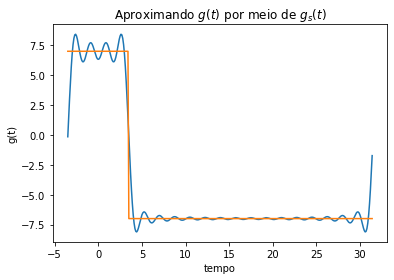

In [107]:
gs_func = smp.lambdify((t), gs)

tempo = np.arange(T0,T2,0.1)

def g_func(t):
    if T0 <= t <= T1:
        return Apos
    elif T1 < t <= T2:
        return Aneg
    else:
        raise Exception('Valor de t fora do intervalo')

g_data = np.array([g_func(t) for t in tempo])

plt.plot(tempo, gs_func(tempo))
plt.plot(tempo, g_data)
plt.title("Aproximando $g(t)$ por meio de $g_s(t)$") 
plt.xlabel("tempo") 
plt.ylabel("g(t)")



plt.show()